## Video Game Sales Analysis

Author: Nat Berryman

In [1]:
# importing the packages we will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import rcParams
import seaborn as sns
import seaborn as sb
sb.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn import linear_model
from statsmodels.formula.api import ols
import sklearn.metrics as metrics

from scipy import stats 
import math

import pylab

%matplotlib inline

In [2]:
vg_sales = pd.read_csv('Project_Three/data/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
pd.set_option('use_inf_as_na', True)

In [4]:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [6]:
drop_cols = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Developer', 'Rating']

vg_sales.drop(drop_cols, axis=1, inplace=True)

In [7]:
vg_sales

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8.0,322.0
1,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0
3,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8.0,192.0
4,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,Tecmo Koei,0.01,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.01,NaN,NaN,NaN,NaN
16716,PSV,2016.0,Adventure,Idea Factory,0.01,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,NaN,NaN,NaN,NaN


In [8]:
vg_sales.groupby(['Year_of_Release']).count()

,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,,,,,,,,
1980.0,9,9,9,9,0,0,0,0
1981.0,46,46,46,46,0,0,0,0
1982.0,36,36,36,36,0,0,0,0
1983.0,17,17,17,17,0,0,0,0
1984.0,14,14,14,14,0,0,0,0
1985.0,14,14,14,14,1,1,1,1
1986.0,21,21,21,21,0,0,0,0
1987.0,16,16,16,16,0,0,0,0
1988.0,15,15,15,15,1,1,1,1


In [9]:
vg_sales = vg_sales[vg_sales['Year_of_Release']>=2000.00]
vg_sales = vg_sales[vg_sales['Year_of_Release']<=2016.00]
vg_sales.groupby(['Year_of_Release']).count()

,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,,,,,,,,
2000.0,350,350,350,350,143,143,107,107
2001.0,482,482,482,482,326,326,257,257
2002.0,829,829,829,829,627,627,464,464
2003.0,775,775,775,775,585,585,516,516
2004.0,762,762,743,762,561,561,489,489
2005.0,939,939,934,939,655,655,583,583
2006.0,1006,1006,1006,1006,620,620,552,552
2007.0,1197,1197,1196,1197,692,692,629,629
2008.0,1427,1427,1427,1427,715,715,661,661


In [10]:
df_year = vg_sales.groupby(['Year_of_Release'])[['Platform']].count()
df_year.head(17)

,Platform
Year_of_Release,
2000.0,350
2001.0,482
2002.0,829
2003.0,775
2004.0,762
2005.0,939
2006.0,1006
2007.0,1197
2008.0,1427


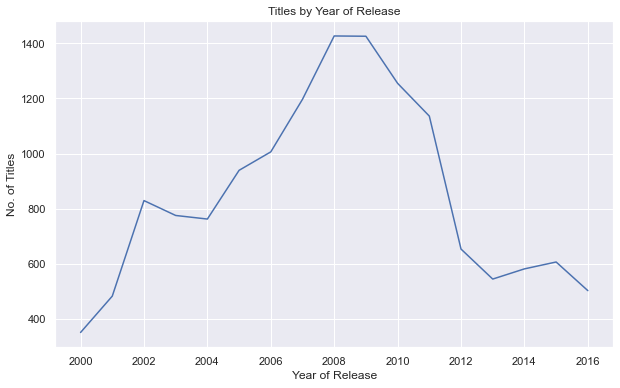

In [11]:
rcParams['figure.figsize'] = 10,6
plt.plot(df_year)
plt.grid(True)
plt.title('Titles by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('No. of Titles')
plt.show()

In [12]:
vg_sales.isnull().sum()

Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
Global_Sales          0
Critic_Score       6583
Critic_Count       6583
User_Score         7099
User_Count         7099
dtype: int64

In [13]:
vg_sales['Critic_Score'] = vg_sales['Critic_Score'].fillna(vg_sales['Critic_Score'].mean())
vg_sales['User_Score'] = vg_sales['User_Score'].fillna(vg_sales['User_Score'].mean())
vg_sales['Critic_Count'] = vg_sales['Critic_Count'].fillna(vg_sales['Critic_Score'].mean())
vg_sales['User_Count'] = vg_sales['User_Count'].fillna(vg_sales['User_Count'].mean())

In [14]:
vg_sales.isnull().sum()

Platform            0
Year_of_Release     0
Genre               0
Publisher          32
Global_Sales        0
Critic_Score        0
Critic_Count        0
User_Score          0
User_Count          0
dtype: int64

In [15]:
vg_sales = vg_sales.dropna()
vg_sales.isnull().sum()

Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
dtype: int64

In [16]:
publishers = vg_sales['Publisher'].unique()
platforms = vg_sales['Platform'].unique()
genres = vg_sales['Genre'].unique()

print("Number of games: ", len(vg_sales))
print("Number of platforms: ", len(platforms))
print("Number of genres: ", len(genres))
print("Number of publishers: ", len(publishers))

Number of games:  14438
Number of platforms:  20
Number of genres:  12
Number of publishers:  461


In [17]:
vg_sales['Platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'GB', 'PS', 'N64', 'PSV', 'DC', 'WS'],
      dtype=object)

In [18]:
vg_sales['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [19]:
vg_sales['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', '505 Games',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'LucasArts', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'SquareSoft', 'RedOctane', 'Atari', 'Vivendi Games',
       'Enix Corporation', 'Namco Bandai Games', 'Eidos Interactive',
       'THQ', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Virgin Interactive', 'Level 5',
       'Acclaim Entertainment', 'Midway Games', 'Deep Silver', 'NCSoft',
       'Tecmo Koei', 'Valve Software', 'Mindscape', 'Infogrames',
       'Unknown', 'Valve', 'Hello Games', 'D3Publisher',
       'Activision Value', 'Oxygen Interactive', 'Global Star',
       'Gotham Games', 'GungHo', 'Crave Entertainment',
       'Rising Star Games', 'Codema

In [20]:
vg_sales['Publisher'].value_counts()

Electronic Arts                 1236
Activision                       920
Ubisoft                          910
Namco Bandai Games               847
Konami Digital Entertainment     700
                                ... 
Team17 Software                    1
Max Five                           1
Black Label Games                  1
Sony Oznline Entertainment         1
Red Flagship                       1
Name: Publisher, Length: 461, dtype: int64

In [21]:
counts = vg_sales['Publisher'].value_counts()
vg_sales['Publisher'] = vg_sales['Publisher'].apply(lambda x: ('Sml_Publisher' if counts[x] < 100 else ('Med_Publisher' if counts[x] < 500 else 'Lge_Publisher')))

In [22]:
vg_sales['Publisher'].value_counts()

Lge_Publisher    6874
Med_Publisher    3792
Sml_Publisher    3772
Name: Publisher, dtype: int64

In [23]:
vg_sales.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,Wii,2006.0,Sports,Lge_Publisher,82.53,76.0,51.0,8.0,322.0
2,Wii,2008.0,Racing,Lge_Publisher,35.52,82.0,73.0,8.3,709.0
3,Wii,2009.0,Sports,Lge_Publisher,32.77,80.0,73.0,8.0,192.0
6,DS,2006.0,Platform,Lge_Publisher,29.80,89.0,65.0,8.5,431.0
7,Wii,2006.0,Misc,Lge_Publisher,28.92,58.0,41.0,6.6,129.0


In [24]:
vg_sales['User_Score'] = vg_sales['User_Score'] * 10
vg_sales['User_Score'].head()

0    80.0
2    83.0
3    80.0
6    85.0
7    66.0
Name: User_Score, dtype: float64

In [25]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         14438 non-null  object 
 1   Year_of_Release  14438 non-null  float64
 2   Genre            14438 non-null  object 
 3   Publisher        14438 non-null  object 
 4   Global_Sales     14438 non-null  float64
 5   Critic_Score     14438 non-null  float64
 6   Critic_Count     14438 non-null  float64
 7   User_Score       14438 non-null  float64
 8   User_Count       14438 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


In [26]:
df_cont = vg_sales[['Global_Sales', 'Year_of_Release','Critic_Score','Critic_Count','User_Score','User_Count']].copy()
df_cat = vg_sales[['Platform','Genre','Publisher']].copy()

In [27]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Platform   14438 non-null  object
 1   Genre      14438 non-null  object
 2   Publisher  14438 non-null  object
dtypes: object(3)
memory usage: 451.2+ KB


In [28]:
df_cat = pd.get_dummies(df_cat)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Platform_3DS             14438 non-null  uint8
 1   Platform_DC              14438 non-null  uint8
 2   Platform_DS              14438 non-null  uint8
 3   Platform_GB              14438 non-null  uint8
 4   Platform_GBA             14438 non-null  uint8
 5   Platform_GC              14438 non-null  uint8
 6   Platform_N64             14438 non-null  uint8
 7   Platform_PC              14438 non-null  uint8
 8   Platform_PS              14438 non-null  uint8
 9   Platform_PS2             14438 non-null  uint8
 10  Platform_PS3             14438 non-null  uint8
 11  Platform_PS4             14438 non-null  uint8
 12  Platform_PSP             14438 non-null  uint8
 13  Platform_PSV             14438 non-null  uint8
 14  Platform_WS              14438 non-null  uint8
 15  Pl

In [29]:
df_cont.describe()

,Global_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
count,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000
mean,0.495552,2008.026735,68.860396,45.777974,71.112679,161.461055
std,1.464948,4.111369,10.248969,25.312061,10.699892,401.271060
min,0.010000,2000.000000,13.000000,3.000000,0.000000,4.000000
25%,0.060000,2005.000000,68.858882,20.000000,71.109754,23.000000
50%,0.150000,2008.000000,68.858882,57.000000,71.109754,161.464523
75%,0.440000,2011.000000,72.000000,68.858882,75.000000,161.464523
max,82.530000,2016.000000,98.000000,113.000000,97.000000,10665.000000


In [30]:
df_cont = df_cont[df_cont['User_Score'] !=0]

In [31]:
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

df_log_norm.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log
0,4.278467,-0.492175,0.654153,0.439822,0.653598,1.104102
2,3.700539,-0.005479,1.098906,0.869002,0.833230,1.685292
3,3.645299,0.237687,0.954378,0.869002,0.653598,0.723377
6,3.580172,-0.492175,1.578376,0.730097,0.949414,1.318785
7,3.559624,-0.492175,-0.927885,0.178636,-0.285073,0.430550


In [32]:
df_log_norm.describe()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log
count,1.443700e+04,1.443700e+04,1.443700e+04,1.443700e+04,1.443700e+04,1.443700e+04
mean,-6.931111e-14,-3.221245e-11,-7.934611e-16,-7.553006e-14,5.238273e-12,-3.625410e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.903672e+00,-1.955179e+00,-9.681167e+00,-2.950709e+00,-1.734615e+01,-2.127114e+00
25%,-6.754062e-01,-7.357050e-01,7.660252e-02,-6.804091e-01,7.878717e-02,-8.391212e-01
50%,-4.728156e-02,-5.479381e-03,7.660252e-02,5.729264e-01,7.878717e-02,5.958369e-01
75%,6.904206e-01,7.236560e-01,3.376914e-01,7.991138e-01,3.386848e-01,5.958369e-01
max,4.278467e+00,1.936468e+00,2.142212e+00,1.391878e+00,1.593794e+00,3.681391e+00


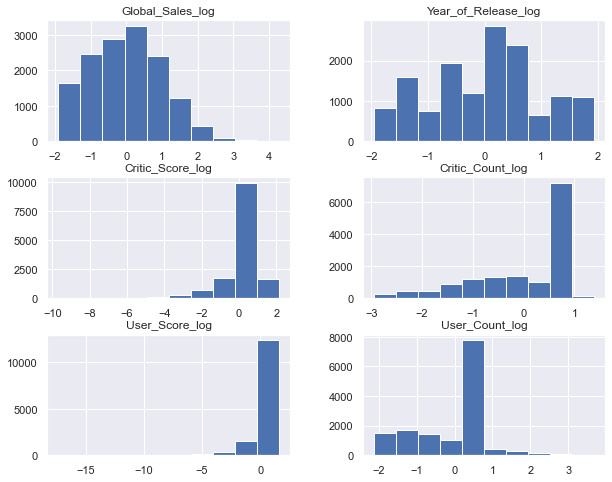

In [33]:
df_log_norm.hist(figsize=(10,8));

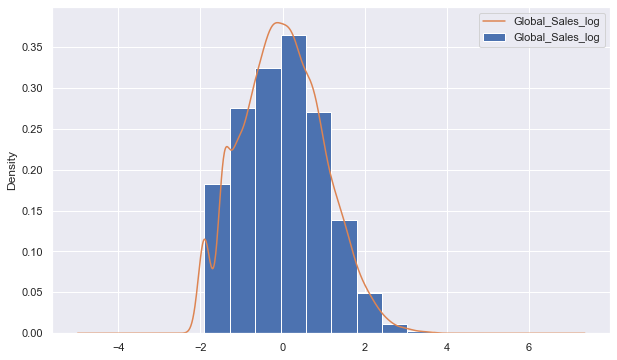

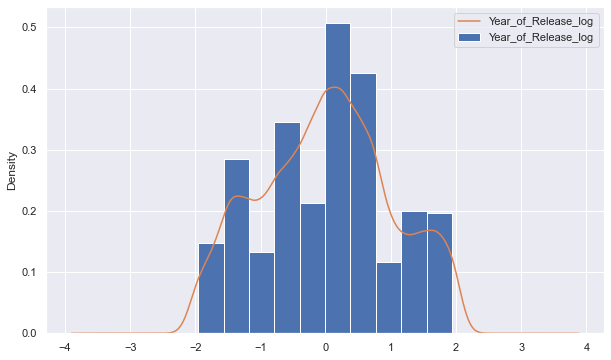

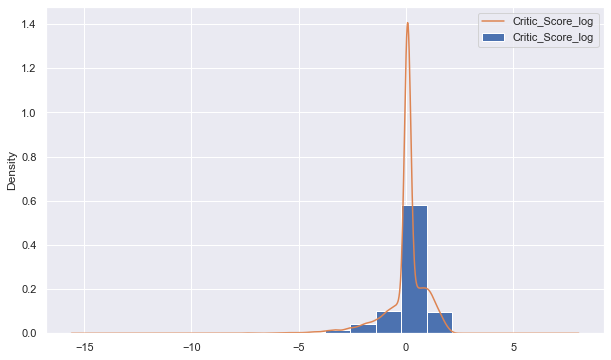

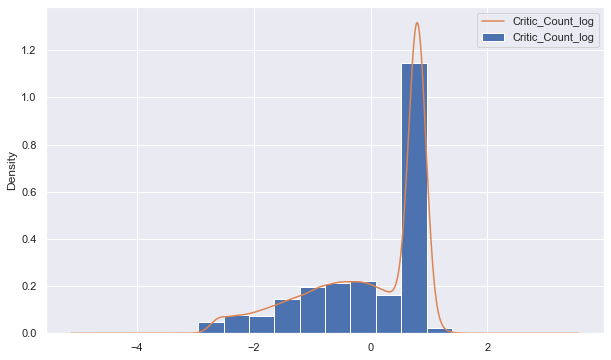

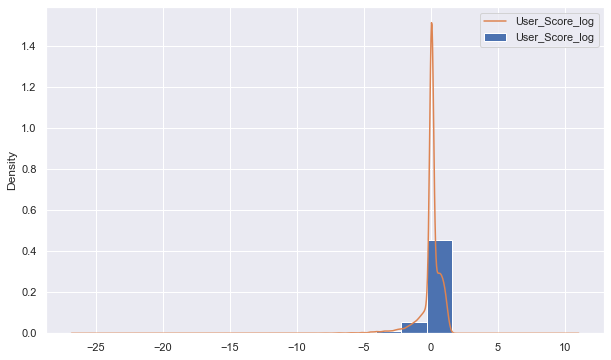

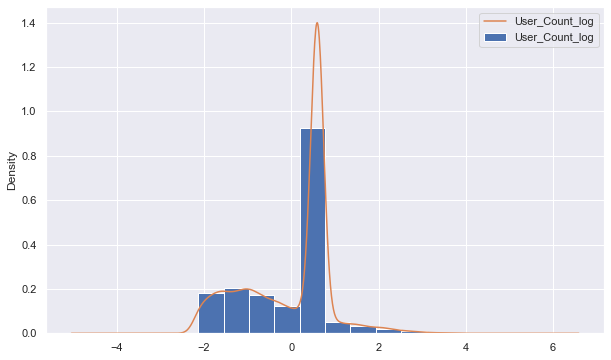

In [34]:
x = list(df_log_norm)
for column in x:
    df_log_norm[column].plot.hist(density=True)
    df_log_norm[column].plot.kde(label=column)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


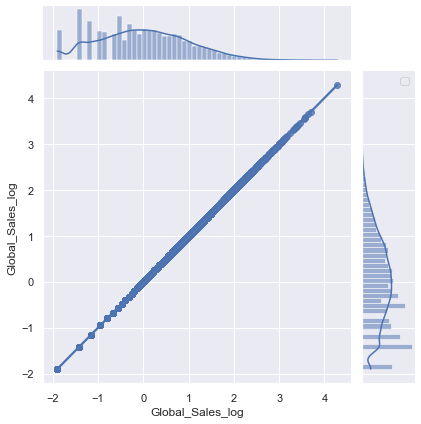

No handles with labels found to put in legend.


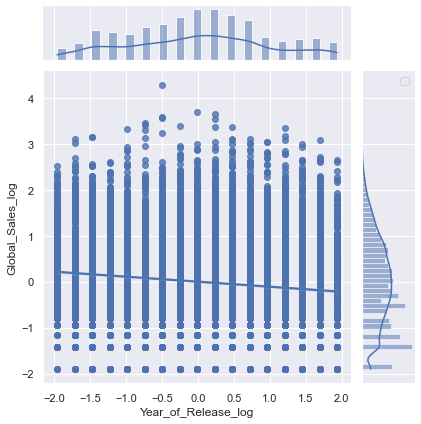

No handles with labels found to put in legend.


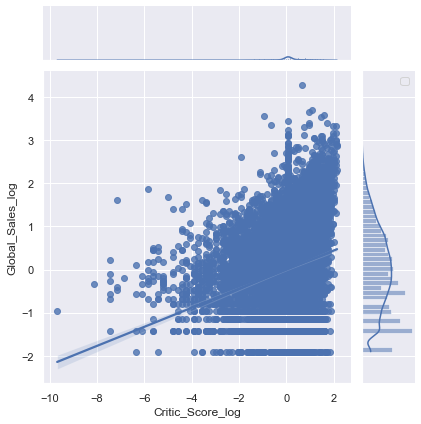

No handles with labels found to put in legend.


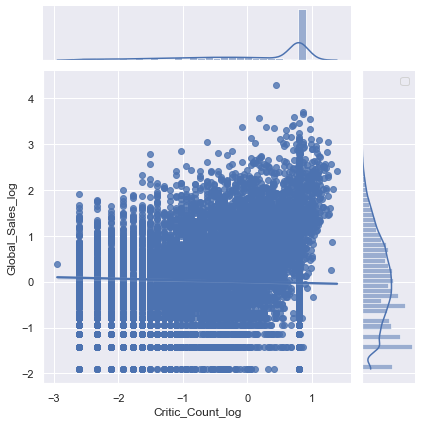

No handles with labels found to put in legend.


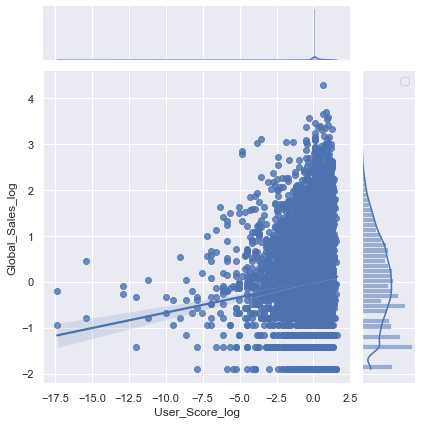

No handles with labels found to put in legend.


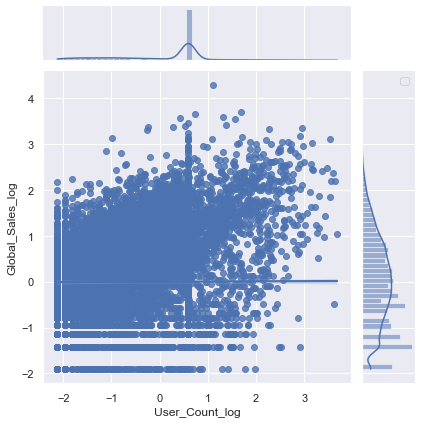

In [35]:
for column in x:
    sns.jointplot(x = column, y='Global_Sales_log', data=df_log_norm, kind = 'reg', label = column)
    plt.legend()
    plt.show()

In [36]:
df_merged = pd.concat([df_log_norm,df_cat], axis = 1)
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
0,4.278467,-0.492175,0.654153,0.439822,0.653598,1.104102,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3.700539,-0.005479,1.098906,0.869002,0.833230,1.685292,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3.645299,0.237687,0.954378,0.869002,0.653598,0.723377,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,3.580172,-0.492175,1.578376,0.730097,0.949414,1.318785,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,3.559624,-0.492175,-0.927885,0.178636,-0.285073,0.430550,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


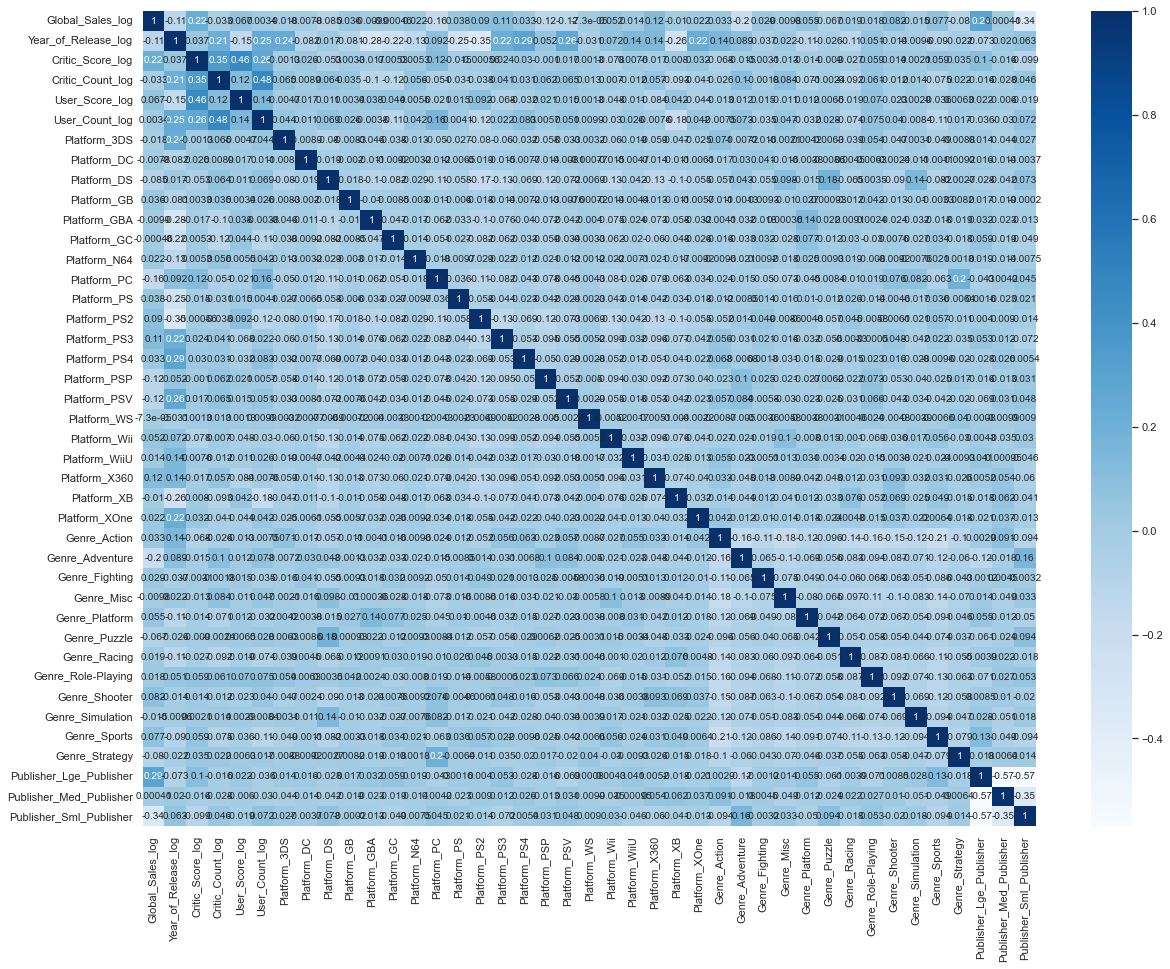

In [37]:
corr = df_merged.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, cmap="Blues", annot=True);

In [38]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14437 non-null  float64
 1   Year_of_Release_log      14437 non-null  float64
 2   Critic_Score_log         14437 non-null  float64
 3   Critic_Count_log         14437 non-null  float64
 4   User_Score_log           14437 non-null  float64
 5   User_Count_log           14437 non-null  float64
 6   Platform_3DS             14438 non-null  uint8  
 7   Platform_DC              14438 non-null  uint8  
 8   Platform_DS              14438 non-null  uint8  
 9   Platform_GB              14438 non-null  uint8  
 10  Platform_GBA             14438 non-null  uint8  
 11  Platform_GC              14438 non-null  uint8  
 12  Platform_N64             14438 non-null  uint8  
 13  Platform_PC              14438 non-null  uint8  
 14  Platform_PS           

In [39]:
df_merged.rename(columns = {'Genre_Role-Playing':'Genre_Role_Playing'}, inplace = True)

In [40]:
cols = df_merged.describe().columns[1:6]

results = [['ind var','r_squared','intercept','slope','p-value']]
for idx, val in enumerate(cols):
    print('Global_Sales_log~' + val)
    f = 'Global_Sales_log~' +val
    model = smf.ols(formula=f, data=df_merged).fit()
    X_new = pd.DataFrame({val: [df_merged[val].min(), df_merged[val].max()]});
    pred = model.predict(X_new)
    results.append([val,model.rsquared,model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])
    print(model.summary())

Global_Sales_log~Year_of_Release_log
['Year_of_Release_log', 0.011997204370291503, -3.5836523364692757e-12, -0.1095317505123076, 8.858457082613057e-40]
                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           8.86e-40
Time:                        14:05:29   Log-Likelihood:                -20398.
No. Observations:               14437   AIC:                         4.080e+04
Df Residuals:                   14435   BIC:                         4.081e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


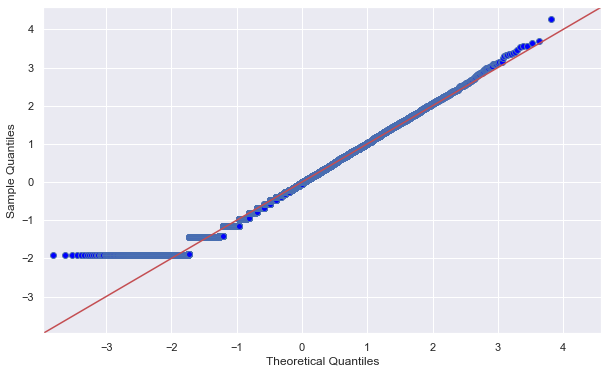

In [41]:
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [42]:
f = 'Global_Sales_log ~ ' + ' + '.join(cols)
model_2 = ols(formula=f, data=df_merged).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     236.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.64e-244
Time:                        14:05:30   Log-Likelihood:                -19916.
No. Observations:               14437   AIC:                         3.984e+04
Df Residuals:                   14431   BIC:                         3.989e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -3.279e-12      0.008   -4.1e-10      1.000      -0.016       0.016
Year_of_Release_log    -0.1120      0.008    -13.213      0.000      -0.129      -0.095
Critic_Score_log        0.2929      0.010     30.550      0.000       0.274       0.312
Critic_Count_log       -0.1104      0.010    -11.606      0.000      -0.129      -0.092
User_Score_log         -0.0729      0.009     -7.928      0.000      -0.091      -0.055
User_Count_log          0.0166      0.009      1.774      0.076      -0.002       0.035
==============================================================================
Omnibus:                      117.765   Durbin-Watson:                   0.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.902
Skew:                           0.117   Prob(JB):                     6.71e-21
Kurtosis:                       2.684   Cond. No.                         2.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


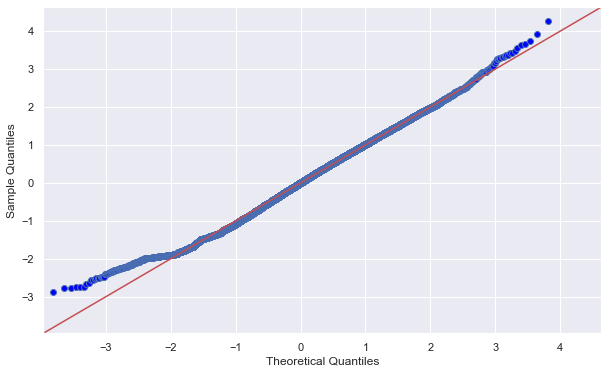

In [43]:
residuals = model_2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [44]:
c_platform = df_merged.columns[6:26]
c_genre = df_merged.columns[26:38]
c_publisher = df_merged.columns[38:41]

In [45]:
cols = [c_platform, c_genre, c_publisher]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_3 = smf.ols(formula=f, data=df_merged).fit()
    print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     81.51
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.91e-301
Time:                        14:05:31   Log-Likelihood:                -19748.
No. Observations:               14437   AIC:                         3.954e+04
Df Residuals:                   14417   BIC:                         3.969e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.098e+12   6.92e+11      1.585

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


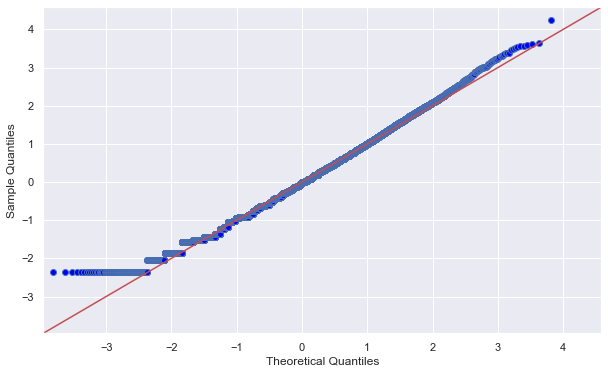

In [46]:
residuals = model_3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14437 non-null  float64
 1   Year_of_Release_log      14437 non-null  float64
 2   Critic_Score_log         14437 non-null  float64
 3   Critic_Count_log         14437 non-null  float64
 4   User_Score_log           14437 non-null  float64
 5   User_Count_log           14437 non-null  float64
 6   Platform_3DS             14438 non-null  uint8  
 7   Platform_DC              14438 non-null  uint8  
 8   Platform_DS              14438 non-null  uint8  
 9   Platform_GB              14438 non-null  uint8  
 10  Platform_GBA             14438 non-null  uint8  
 11  Platform_GC              14438 non-null  uint8  
 12  Platform_N64             14438 non-null  uint8  
 13  Platform_PC              14438 non-null  uint8  
 14  Platform_PS           

In [48]:
all_cols = df_merged.columns[1:41]

In [49]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_4 = smf.ols(formula=f, data=df_merged).fit()
    print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     164.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:05:32   Log-Likelihood:                -17939.
No. Observations:               14437   AIC:                         3.595e+04
Df Residuals:                   14399   BIC:                         3.624e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


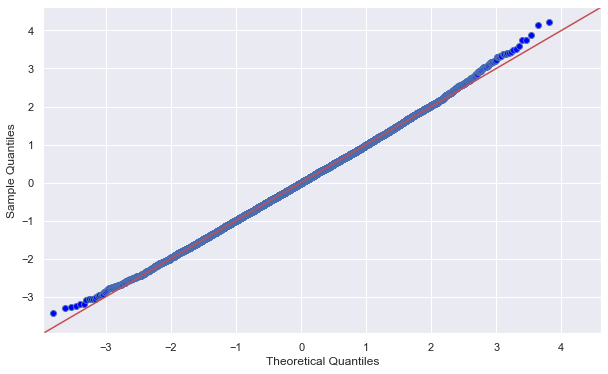

In [50]:
residuals = model_4.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [51]:
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
0,4.278467,-0.492175,0.654153,0.439822,0.653598,1.104102,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,3.700539,-0.005479,1.098906,0.869002,0.833230,1.685292,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3.645299,0.237687,0.954378,0.869002,0.653598,0.723377,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,3.580172,-0.492175,1.578376,0.730097,0.949414,1.318785,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,3.559624,-0.492175,-0.927885,0.178636,-0.285073,0.430550,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
0,-0.492175,0.654153,0.439822,0.653598,1.104102,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,-0.005479,1.098906,0.869002,0.833230,1.685292,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.237687,0.954378,0.869002,0.653598,0.723377,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,-0.492175,1.578376,0.730097,0.949414,1.318785,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,-0.492175,-0.927885,0.178636,-0.285073,0.430550,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
y.head()

,Global_Sales_log
0,4.278467
2,3.700539
3,3.645299
6,3.580172
7,3.559624


In [54]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Platform_3DS               0
Platform_DC                0
Platform_DS                0
Platform_GB                0
Platform_GBA               0
Platform_GC                0
Platform_N64               0
Platform_PC                0
Platform_PS                0
Platform_PS2               0
Platform_PS3               0
Platform_PS4               0
Platform_PSP               0
Platform_PSV               0
Platform_WS                0
Platform_Wii               0
Platform_WiiU              0
Platform_X360              0
Platform_XB                0
Platform_XOne              0
Genre_Action               0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulati

In [55]:
np.any(np.isnan(y))

True

In [56]:
np.any(np.isnan(y))

True

In [57]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [58]:
np.any(np.isnan(y))

False

In [59]:
np.all(np.isfinite(y))

True

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [61]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [62]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [63]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.09405219]
 [ 0.77600168]
 [-0.26418091]
 ...
 [ 0.11399542]
 [ 0.28318929]
 [-0.63356215]]


In [64]:
r2_score(y_test,y_pred)

0.2996878236012783

C:\Users\shann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


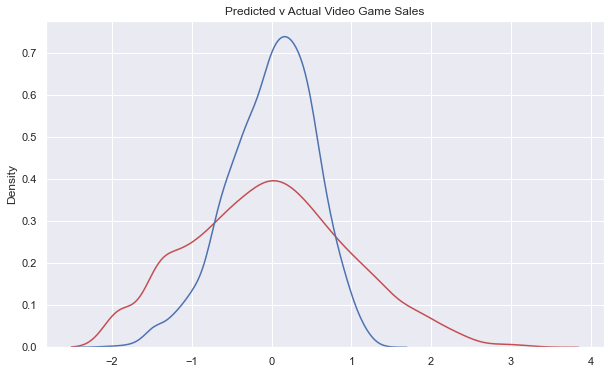

In [65]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [66]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [67]:
import warnings
warnings.filterwarnings('ignore')

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Publisher_Sml_Publisher        with p-value 0.0
Add  Critic_Score_log               with p-value 3.48893e-131
Add  Platform_PC                    with p-value 7.67038e-115
Add  Genre_Adventure                with p-value 2.70916e-99
Add  Platform_PSV                   with p-value 7.78239e-46
Add  Platform_PSP                   with p-value 7.94634e-52
Add  Publisher_Med_Publisher        with p-value 9.98767e-43
Add  Platform_DS                    with p-value 9.39776e-39
Add  Critic_Count_log               with p-value 3.43858e-25
Add  Platform_X360                  with p-value 7.58762e-22
Add  User_Count_log                 with p-value 5.05319e-18
Add  Platform_GBA                   with p-value 8.44181e-17
Add  Platform_XB                    with p-value 9.48985e-17
Add  Year_of_Release_log            with p-value 2.00782e-22
Add  Platform_GC                    with p-value 4.25555e-33
Add  Genre_Shooter                  with p-value 6.51579e-14
Add  User_Score_log           

In [68]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_5 = sm.OLS(y,X_with_intercept).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     209.6
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:05:52   Log-Likelihood:                -18019.
No. Observations:               14437   AIC:                         3.610e+04
Df Residuals:                   14408   BIC:                         3.631e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -7.941e+12   1.94e+12     -4.088      0.000   -1.17e+13   -4.13e+12
Publisher_Sml_Publisher  7.941e+12   1.94e+12      4.088      0.000    4.13e+12    1.17e+13
Critic_Score_log            0.2675      0.009     30.553      0.000       0.250       0.285
Platform_PC                -0.7658      0.035    -21.809      0.000      -0.835      -0.697
Genre_Adventure            -0.3659      0.028    -13.007      0.000      -0.421      -0.311
Platform_PSV               -0.3686      0.048     -7.651      0.000      -0.463      -0.274
Platform_PSP               -0.3504      0.030    -11.787      0.000      -0.409      -0.292
Publisher_Med_Publisher  7.941e+12   1.94e+12      4.088      0.000    4.13e+12    1.17e+13
Platform_DS                -0.1584      0.025     -6.376      0.000      -0.207      -0.110
Critic_Count_log           -0.1278      0.009    -14.660      0.000      -0.145      -0.111
Platform_X360               0.3460      0.030     11.375      0.000       0.286       0.406
User_Count_log              0.0775      0.009      9.083      0.000       0.061       0.094
Platform_GBA               -0.4239      0.035    -12.190      0.000      -0.492      -0.356
Platform_XB                -0.3683      0.034    -10.764      0.000      -0.435      -0.301
Year_of_Release_log        -0.1804      0.011    -17.050      0.000      -0.201      -0.160
Platform_GC                -0.4336      0.040    -10.839      0.000      -0.512      -0.355
Genre_Shooter               0.2281      0.028      8.093      0.000       0.173       0.283
User_Score_log             -0.0557      0.008     -6.783      0.000      -0.072      -0.040
Genre_Strategy             -0.1924      0.039     -4.960      0.000      -0.268      -0.116
Platform_PS3                0.2743      0.031      8.963      0.000       0.214       0.334
Genre_Role_Playing          0.1899      0.027      7.084      0.000       0.137       0.242
Platform_Wii                0.2175      0.029      7.433      0.000       0.160       0.275
Platform_PS4                0.3403      0.051      6.688      0.000       0.241       0.440
Genre_Puzzle               -0.1365      0.041     -3.320      0.001      -0.217      -0.056
Platform_DC                -0.7075      0.153     -4.619      0.000      -1.008      -0.407
Publisher_Lge_Publisher  7.941e+12   1.94e+12      4.088      0.000    4.13e+12    1.17e+13
Genre_Platform              0.1721      0.034      5.063      0.000       0.105       0.239
Genre_Action                0.0937      0.020      4.754      0.000       0.055       0.132
Platform_XOne               0.2046      0.061      3.365      0.001       0.085       0.324
Genre_Fighting              0.1061      0.036      2.985      0.003       0.036       0.176
===============================================

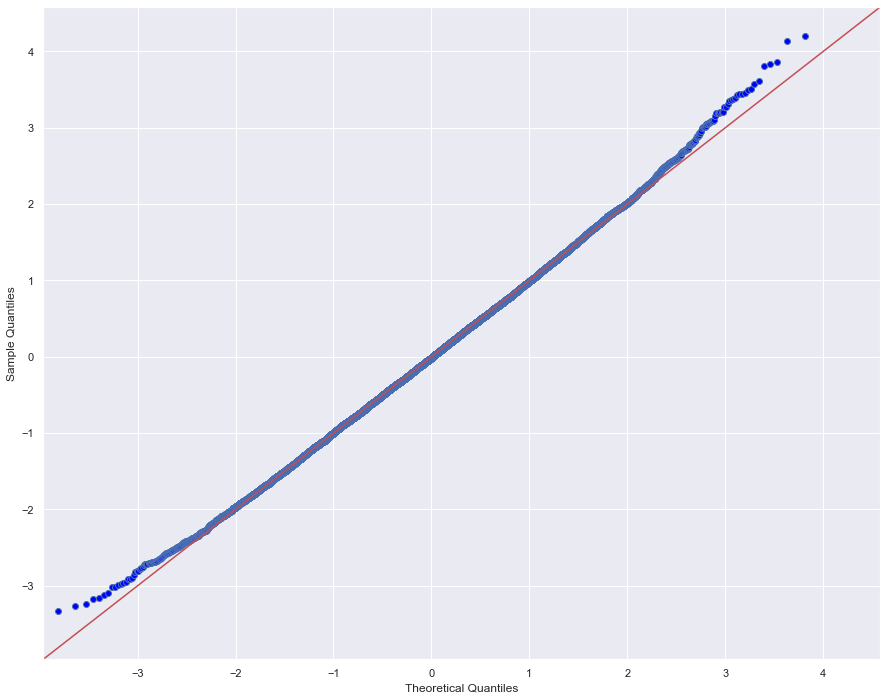

In [69]:
residuals = model_5.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [70]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
0,-0.492175,0.654153,0.439822,0.653598,1.104102,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,-0.005479,1.098906,0.869002,0.833230,1.685292,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.237687,0.954378,0.869002,0.653598,0.723377,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,-0.492175,1.578376,0.730097,0.949414,1.318785,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,-0.492175,-0.927885,0.178636,-0.285073,0.430550,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Platform_3DS               0
Platform_DC                0
Platform_DS                0
Platform_GB                0
Platform_GBA               0
Platform_GC                0
Platform_N64               0
Platform_PC                0
Platform_PS                0
Platform_PS2               0
Platform_PS3               0
Platform_PS4               0
Platform_PSP               0
Platform_PSV               0
Platform_WS                0
Platform_Wii               0
Platform_WiiU              0
Platform_X360              0
Platform_XB                0
Platform_XOne              0
Genre_Action               0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulati

In [72]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [73]:
np.any(np.isnan(y))

False

In [74]:
np.all(np.isfinite(y))

True

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [76]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [77]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.09405219]
 [ 0.77600168]
 [-0.26418091]
 ...
 [ 0.11399542]
 [ 0.28318929]
 [-0.63356215]]


In [79]:
r2_score(y_test,y_pred)

0.2996878236012783

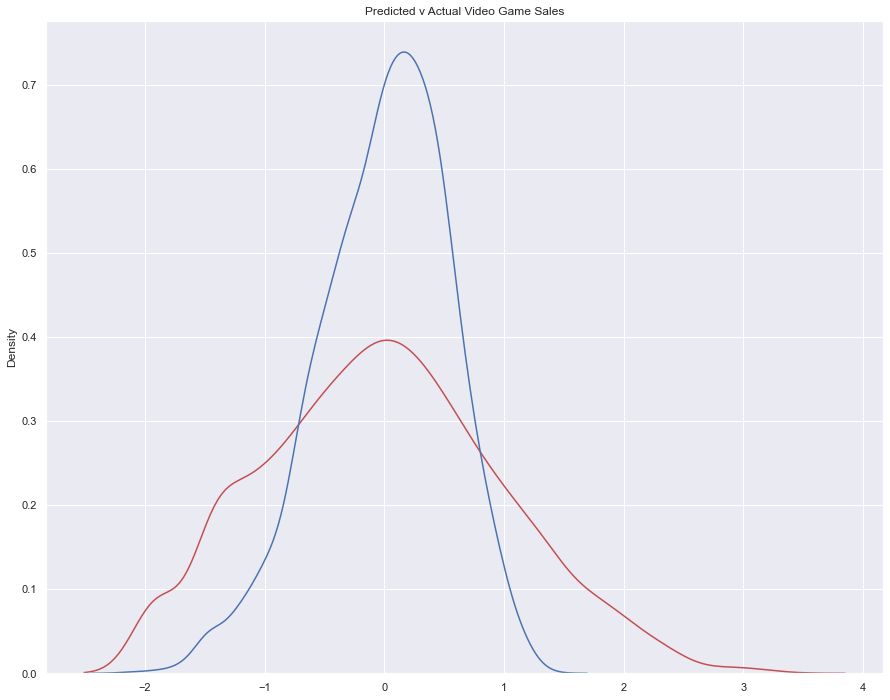

In [80]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [81]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14437 non-null  float64
 1   Year_of_Release_log      14437 non-null  float64
 2   Critic_Score_log         14437 non-null  float64
 3   Critic_Count_log         14437 non-null  float64
 4   User_Score_log           14437 non-null  float64
 5   User_Count_log           14437 non-null  float64
 6   Platform_3DS             14438 non-null  uint8  
 7   Platform_DC              14438 non-null  uint8  
 8   Platform_DS              14438 non-null  uint8  
 9   Platform_GB              14438 non-null  uint8  
 10  Platform_GBA             14438 non-null  uint8  
 11  Platform_GC              14438 non-null  uint8  
 12  Platform_N64             14438 non-null  uint8  
 13  Platform_PC              14438 non-null  uint8  
 14  Platform_PS           

In [82]:
sum_col = df_merged['Platform_3DS']+df_merged['Platform_DS'] + df_merged['Platform_GB']+ df_merged['Platform_GBA'] + df_merged['Platform_GC']+df_merged['Platform_N64']+df_merged['Platform_WiiU']+df_merged['Platform_Wii']
df_merged['Nintendo'] = sum_col

In [83]:
sum_col = df_merged['Platform_PS'] + df_merged['Platform_PS3']+df_merged['Platform_PS2']+ df_merged['Platform_PS4']+df_merged['Platform_PSP']+df_merged['Platform_PSV']
df_merged['Sony'] = sum_col

In [84]:
sum_col = df_merged['Platform_X360']+df_merged['Platform_XOne']+df_merged['Platform_XB']
df_merged['Microsoft'] = sum_col

In [85]:
sum_col = df_merged['Platform_DC']
df_merged['Sega'] = sum_col

In [86]:
sum_col = df_merged['Platform_PC'] + df_merged['Platform_WS']
df_merged['PC'] = sum_col

In [87]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14437 non-null  float64
 1   Year_of_Release_log      14437 non-null  float64
 2   Critic_Score_log         14437 non-null  float64
 3   Critic_Count_log         14437 non-null  float64
 4   User_Score_log           14437 non-null  float64
 5   User_Count_log           14437 non-null  float64
 6   Platform_3DS             14438 non-null  uint8  
 7   Platform_DC              14438 non-null  uint8  
 8   Platform_DS              14438 non-null  uint8  
 9   Platform_GB              14438 non-null  uint8  
 10  Platform_GBA             14438 non-null  uint8  
 11  Platform_GC              14438 non-null  uint8  
 12  Platform_N64             14438 non-null  uint8  
 13  Platform_PC              14438 non-null  uint8  
 14  Platform_PS           

In [88]:
df_merged = df_merged.drop(df_merged.columns[6:27], axis=1)

In [89]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14437 non-null  float64
 1   Year_of_Release_log      14437 non-null  float64
 2   Critic_Score_log         14437 non-null  float64
 3   Critic_Count_log         14437 non-null  float64
 4   User_Score_log           14437 non-null  float64
 5   User_Count_log           14437 non-null  float64
 6   Genre_Adventure          14438 non-null  uint8  
 7   Genre_Fighting           14438 non-null  uint8  
 8   Genre_Misc               14438 non-null  uint8  
 9   Genre_Platform           14438 non-null  uint8  
 10  Genre_Puzzle             14438 non-null  uint8  
 11  Genre_Racing             14438 non-null  uint8  
 12  Genre_Role_Playing       14438 non-null  uint8  
 13  Genre_Shooter            14438 non-null  uint8  
 14  Genre_Simulation      

In [90]:
all_cols = df_merged.columns[1:24]

In [91]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_6 = smf.ols(formula=f, data=df_merged).fit()
    print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     212.7
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:06:02   Log-Likelihood:                -18456.
No. Observations:               14437   AIC:                         3.696e+04
Df Residuals:                   14414   BIC:                         3.713e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5

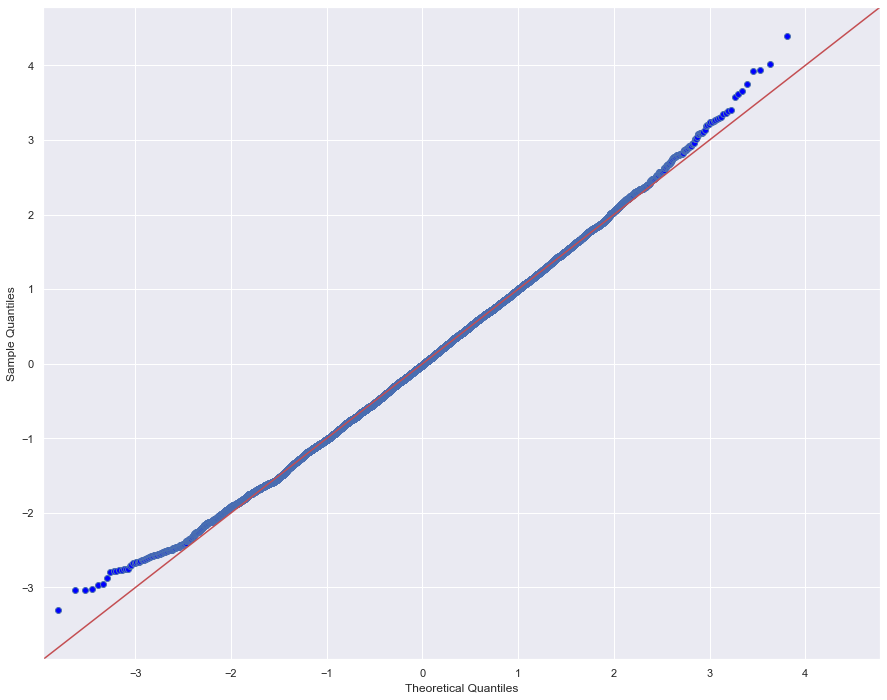

In [92]:
residuals = model_6.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [93]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher,Nintendo,Sony,Microsoft,Sega,PC
0,-0.492175,0.654153,0.439822,0.653598,1.104102,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,-0.005479,1.098906,0.869002,0.833230,1.685292,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0.237687,0.954378,0.869002,0.653598,0.723377,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
6,-0.492175,1.578376,0.730097,0.949414,1.318785,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
7,-0.492175,-0.927885,0.178636,-0.285073,0.430550,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [94]:
list(X.columns)

['Year_of_Release_log',
 'Critic_Score_log',
 'Critic_Count_log',
 'User_Score_log',
 'User_Count_log',
 'Genre_Adventure',
 'Genre_Fighting',
 'Genre_Misc',
 'Genre_Platform',
 'Genre_Puzzle',
 'Genre_Racing',
 'Genre_Role_Playing',
 'Genre_Shooter',
 'Genre_Simulation',
 'Genre_Sports',
 'Genre_Strategy',
 'Publisher_Lge_Publisher',
 'Publisher_Med_Publisher',
 'Publisher_Sml_Publisher',
 'Nintendo',
 'Sony',
 'Microsoft',
 'Sega',
 'PC']

In [95]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulation           0
Genre_Sports               0
Genre_Strategy             0
Publisher_Lge_Publisher    0
Publisher_Med_Publisher    0
Publisher_Sml_Publisher    0
Nintendo                   0
Sony                       0
Microsoft                  0
Sega                       0
PC                         0
dtype: int64

In [96]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [97]:
np.any(np.isnan(y))

False

In [98]:
np.all(np.isfinite(y))

True

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [100]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [101]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.24085273]
 [ 0.58083018]
 [ 0.02549069]
 ...
 [-0.06188183]
 [-0.03403949]
 [-0.5213716 ]]


In [103]:
r2_score(y_test,y_pred)

0.24825224847641136

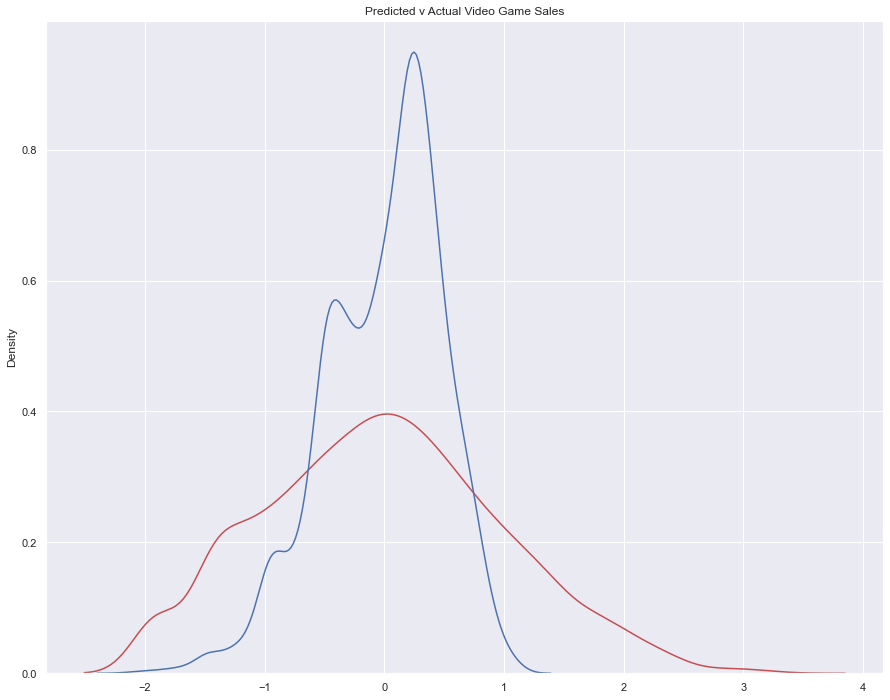

In [104]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [105]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [106]:
import warnings
warnings.filterwarnings('ignore')

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Publisher_Sml_Publisher        with p-value 0.0
Add  Critic_Score_log               with p-value 3.48893e-131
Add  PC                             with p-value 3.81663e-114
Add  Genre_Adventure                with p-value 2.40415e-99
Add  Publisher_Lge_Publisher        with p-value 8.65068e-46
Add  Critic_Count_log               with p-value 6.72742e-36
Add  Genre_Shooter                  with p-value 4.95216e-24
Add  User_Count_log                 with p-value 3.28595e-12
Add  Year_of_Release_log            with p-value 4.27198e-14
Add  User_Score_log                 with p-value 2.77566e-16
Add  Nintendo                       with p-value 3.63706e-12
Add  Publisher_Med_Publisher        with p-value 1.8863e-11
Add  Genre_Strategy                 with p-value 2.62529e-11
Add  Genre_Puzzle                   with p-value 2.30777e-09
Add  Microsoft                      with p-value 0.000437022
Add  Genre_Role_Playing             with p-value 0.00169496
Add  Sony                       

In [107]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_7 = sm.OLS(y,X_with_intercept).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:06:11   Log-Likelihood:                -18532.
No. Observations:               14437   AIC:                         3.710e+04
Df Residuals:                   14420   BIC:                         3.723e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4.988e+12   1.64e+12     -3.047      0.002    -8.2e+12   -1.78e+12
Publisher_Sml_Publisher  1.006e+12    3.3e+11      3.047      0.002    3.59e+11    1.65e+12
Critic_Score_log            0.2601      0.009     29.030      0.000       0.243       0.278
PC                       3.982e+12   1.31e+12      3.047      0.002    1.42e+12    6.54e+12
Genre_Adventure            -0.5065      0.028    -18.343      0.000      -0.561      -0.452
Publisher_Lge_Publisher  1.006e+12    3.3e+11      3.047      0.002    3.59e+11    1.65e+12
Critic_Count_log           -0.1207      0.009    -13.615      0.000      -0.138      -0.103
Genre_Shooter               0.2123      0.028      7.603      0.000       0.158       0.267
User_Count_log              0.0841      0.009      9.630      0.000       0.067       0.101
Year_of_Release_log        -0.0801      0.008    -10.238      0.000      -0.095      -0.065
User_Score_log             -0.0682      0.008     -8.087      0.000      -0.085      -0.052
Nintendo                 3.982e+12   1.31e+12      3.047      0.002    1.42e+12    6.54e+12
Genre_Strategy             -0.2592      0.039     -6.588      0.000      -0.336      -0.182
Genre_Puzzle               -0.2355      0.042     -5.663      0.000      -0.317      -0.154
Microsoft                3.982e+12   1.31e+12      3.047      0.002    1.42e+12    6.54e+12
Genre_Role_Playing          0.0801      0.026      3.055      0.002       0.029       0.131
Sony                     3.982e+12   1.31e+12      3.047      0.002    1.42e+12    6.54e+12
Sega                     3.982e+12   1.31e+12      3.047      0.002    1.42e+12    6.54e+12
Publisher_Med_Publisher  1.006e+12    3.3e+11      3.047      0.002    3.59e+11    1.65e+12
==============================================================================
Omnibus:                       31.662   Durbin-Watson:                   0.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.793
Skew:                           0.112   Prob(JB):                     1.25e-07
Kurtosis:                       2.945   Cond. No.                     1.28e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.74e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

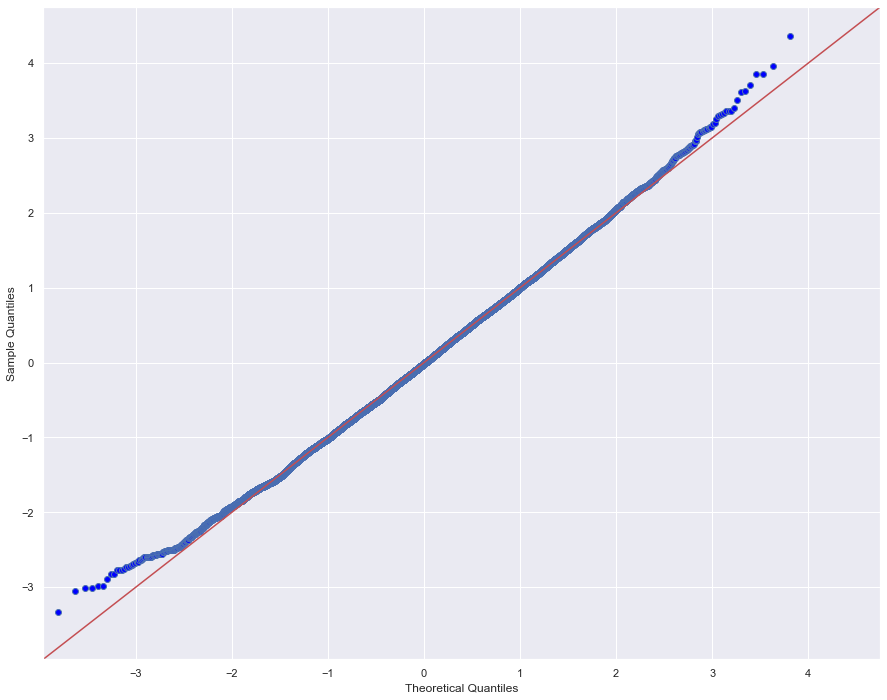

In [108]:
residuals = model_7.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [109]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True])

In [110]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression()

In [111]:
yhat = linreg.predict(X[selected_columns])

In [112]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [113]:
r_squared

Global_Sales_log    0.033866
dtype: float64

In [114]:
adjusted_r_squared

Global_Sales_log    0.033531
dtype: float64

In [115]:
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher,Nintendo,Sony,Microsoft,Sega,PC
0,4.278467,-0.492175,0.654153,0.439822,0.653598,1.104102,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,3.700539,-0.005479,1.098906,0.869002,0.833230,1.685292,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,3.645299,0.237687,0.954378,0.869002,0.653598,0.723377,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
6,3.580172,-0.492175,1.578376,0.730097,0.949414,1.318785,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
7,3.559624,-0.492175,-0.927885,0.178636,-0.285073,0.430550,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [116]:
df_merged['Total_Engagement'] = df_merged['Critic_Count_log'] + df_merged['User_Count_log']
df_merged['Total_Score'] = (df_merged['Critic_Score_log'] + df_merged['User_Score_log']) / 2
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher,Nintendo,Sony,Microsoft,Sega,PC,Total_Engagement,Total_Score
0,4.278467,-0.492175,0.654153,0.439822,0.653598,1.104102,0,0,0,0,...,1,0,0,1,0,0,0,0,1.543924,0.653875
2,3.700539,-0.005479,1.098906,0.869002,0.833230,1.685292,0,0,0,0,...,1,0,0,1,0,0,0,0,2.554294,0.966068
3,3.645299,0.237687,0.954378,0.869002,0.653598,0.723377,0,0,0,0,...,1,0,0,1,0,0,0,0,1.592379,0.803988
6,3.580172,-0.492175,1.578376,0.730097,0.949414,1.318785,0,0,0,1,...,1,0,0,1,0,0,0,0,2.048882,1.263895
7,3.559624,-0.492175,-0.927885,0.178636,-0.285073,0.430550,0,0,1,0,...,1,0,0,1,0,0,0,0,0.609186,-0.606479


In [117]:
drop_cols = ['Year_of_Release_log','Critic_Score_log', 'Critic_Count_log', 'User_Score_log', 'User_Count_log', 'Publisher_Lge_Publisher', 'Publisher_Med_Publisher', 'Publisher_Sml_Publisher']

df_merged.drop(drop_cols, axis=1, inplace=True)

In [118]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14438 entries, 0 to 16718
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Global_Sales_log    14437 non-null  float64
 1   Genre_Adventure     14438 non-null  uint8  
 2   Genre_Fighting      14438 non-null  uint8  
 3   Genre_Misc          14438 non-null  uint8  
 4   Genre_Platform      14438 non-null  uint8  
 5   Genre_Puzzle        14438 non-null  uint8  
 6   Genre_Racing        14438 non-null  uint8  
 7   Genre_Role_Playing  14438 non-null  uint8  
 8   Genre_Shooter       14438 non-null  uint8  
 9   Genre_Simulation    14438 non-null  uint8  
 10  Genre_Sports        14438 non-null  uint8  
 11  Genre_Strategy      14438 non-null  uint8  
 12  Nintendo            14438 non-null  uint8  
 13  Sony                14438 non-null  uint8  
 14  Microsoft           14438 non-null  uint8  
 15  Sega                14438 non-null  uint8  
 16  PC  

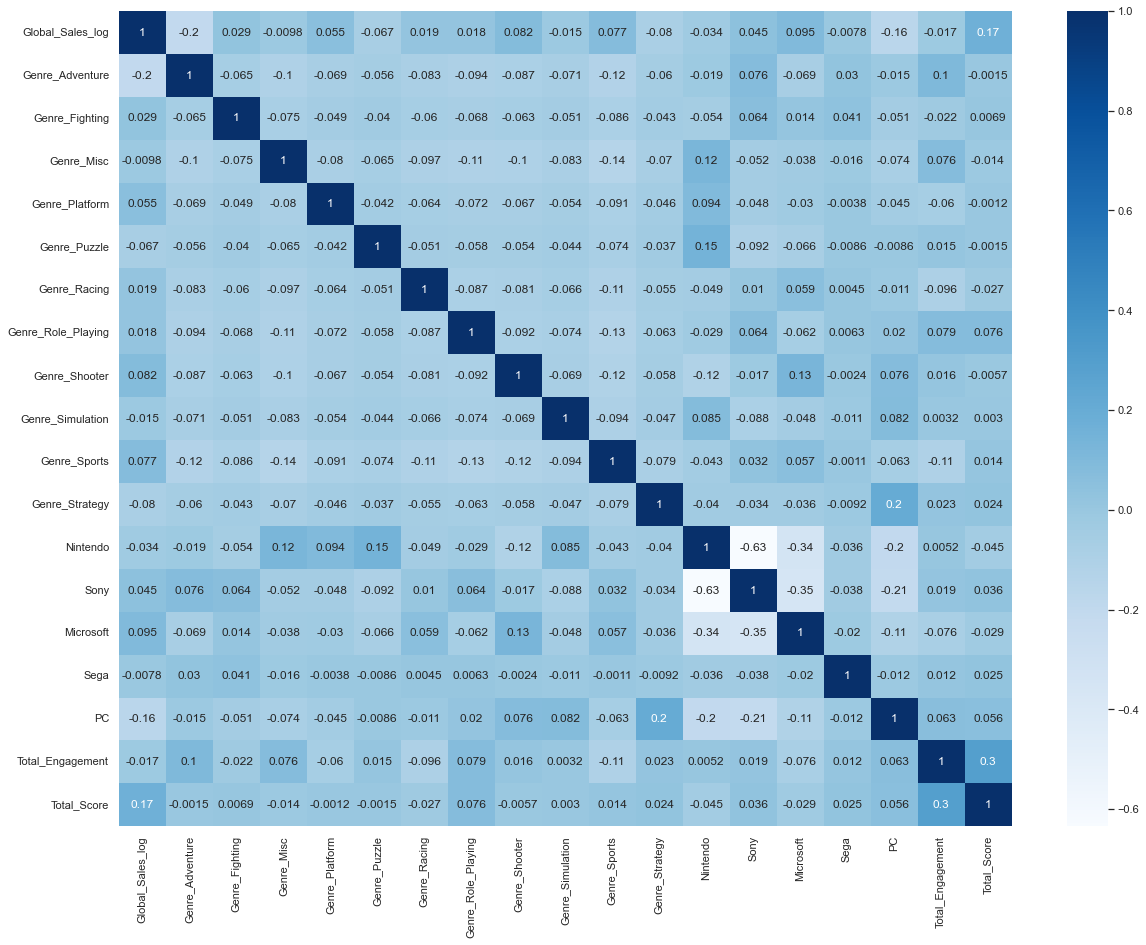

In [119]:
corr = df_merged.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, cmap="Blues", annot=True);

In [120]:
all_cols = df_merged.columns[1:19]

In [121]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_8 = smf.ols(formula=f, data=df_merged).fit()
    print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     120.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:06:18   Log-Likelihood:                -19524.
No. Observations:               14437   AIC:                         3.908e+04
Df Residuals:                   14419   BIC:                         3.922e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.732e+12   1.31

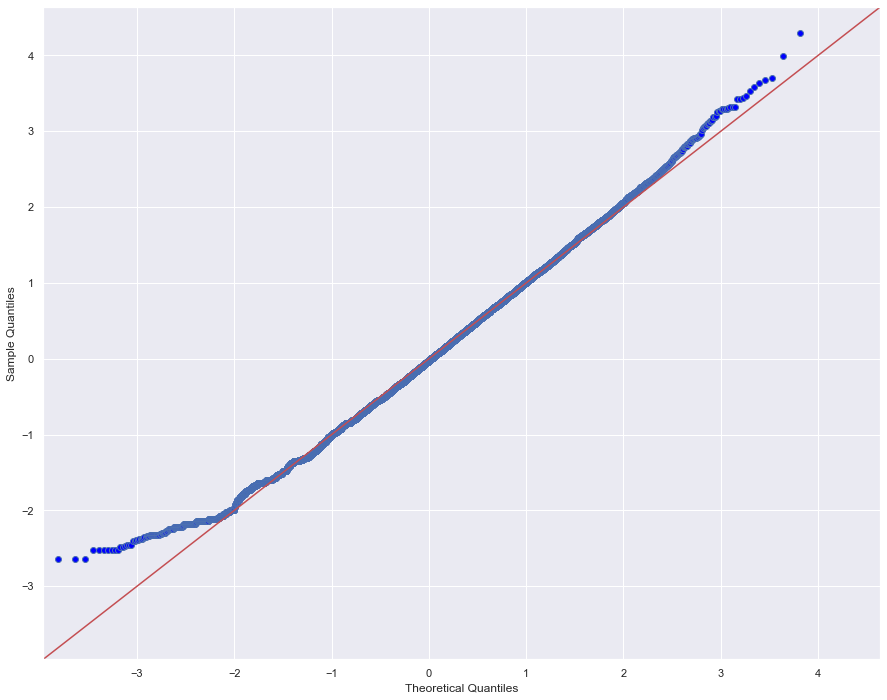

In [122]:
residuals = model_8.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [123]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Nintendo,Sony,Microsoft,Sega,PC,Total_Engagement,Total_Score
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.543924,0.653875
2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,2.554294,0.966068
3,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1.592379,0.803988
6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,2.048882,1.263895
7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0.609186,-0.606479


In [124]:
y.head()

,Global_Sales_log
0,4.278467
2,3.700539
3,3.645299
6,3.580172
7,3.559624


In [125]:
X = X.dropna()
X.isnull().sum()

Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing          0
Genre_Role_Playing    0
Genre_Shooter         0
Genre_Simulation      0
Genre_Sports          0
Genre_Strategy        0
Nintendo              0
Sony                  0
Microsoft             0
Sega                  0
PC                    0
Total_Engagement      0
Total_Score           0
dtype: int64

In [126]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [128]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [129]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [130]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.05267334]
 [ 0.23895264]
 [ 0.33154297]
 ...
 [ 0.12756348]
 [ 0.31262207]
 [-0.05773926]]


In [131]:
r2_score(y_test,y_pred)

0.12439986122104352

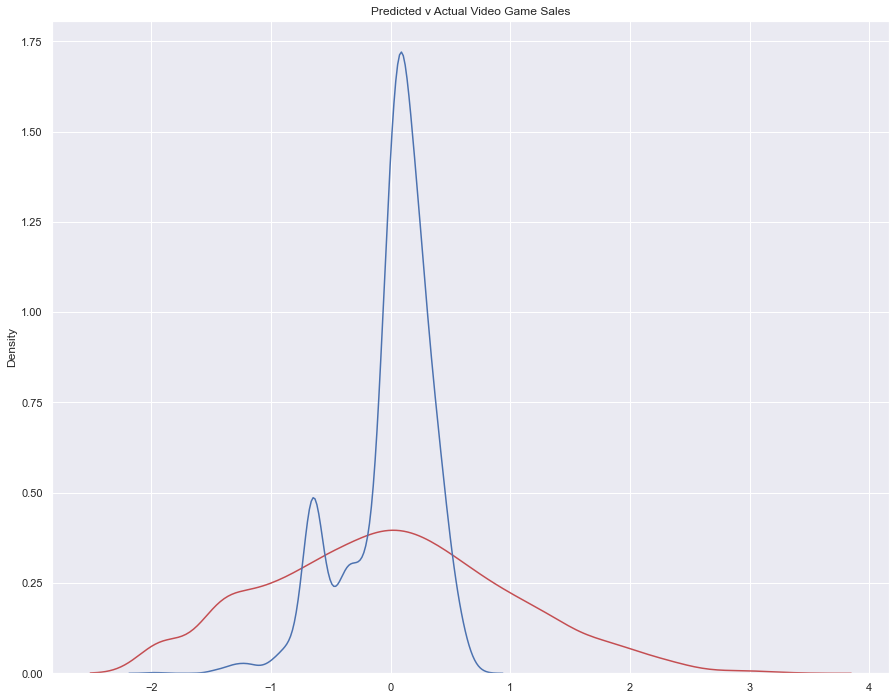

In [132]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [133]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [134]:
import warnings
warnings.filterwarnings('ignore')

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Genre_Adventure                with p-value 1.03269e-136
Add  Total_Score                    with p-value 1.00281e-96
Add  PC                             with p-value 3.23298e-109
Add  Genre_Puzzle                   with p-value 4.78903e-24
Add  Genre_Shooter                  with p-value 2.74875e-21
Add  Genre_Strategy                 with p-value 5.77503e-14
Add  Microsoft                      with p-value 6.5366e-11
Add  Genre_Misc                     with p-value 5.34036e-08
Add  Total_Engagement               with p-value 5.15171e-05
Add  Sony                           with p-value 0.000113847
Add  Genre_Platform                 with p-value 5.63545e-05
Add  Genre_Sports                   with p-value 0.000202126
resulting features:
['Genre_Adventure', 'Total_Score', 'PC', 'Genre_Puzzle', 'Genre_Shooter', 'Genre_Strategy', 'Microsoft', 'Genre_Misc', 'Total_Engagement', 'Sony', 'Genre_Platform', 'Genre_Sports']


In [135]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_9 = sm.OLS(y,X_with_intercept).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     172.0
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:06:29   Log-Likelihood:                -19519.
No. Observations:               14437   AIC:                         3.906e+04
Df Residuals:                   14424   BIC:                         3.916e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0363      0.016      2.336      0.020       0.006       0.067
Genre_Adventure     -0.7282      0.030    -24.585      0.000      -0.786      -0.670
Total_Score          0.2197      0.010     22.893      0.000       0.201       0.238
PC                  -0.6277      0.035    -18.144      0.000      -0.695      -0.560
Genre_Puzzle        -0.3762      0.045     -8.403      0.000      -0.464      -0.288
Genre_Shooter        0.2479      0.030      8.154      0.000       0.188       0.307
Genre_Strategy      -0.2988      0.042     -7.061      0.000      -0.382      -0.216
Microsoft            0.1729      0.024      7.232      0.000       0.126       0.220
Genre_Misc          -0.0876      0.026     -3.310      0.001      -0.140      -0.036
Total_Engagement    -0.0173      0.005     -3.566      0.000      -0.027      -0.008
Sony                 0.0749      0.018      4.154      0.000       0.040       0.110
Genre_Platform       0.1675      0.037      4.538      0.000       0.095       0.240
Genre_Sports         0.0893      0.024      3.717      0.000       0.042       0.136
==============================================================================
Omnibus:                       93.540   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.166
Skew:                           0.184   Prob(JB):                     5.88e-21
Kurtosis:                       2.861   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

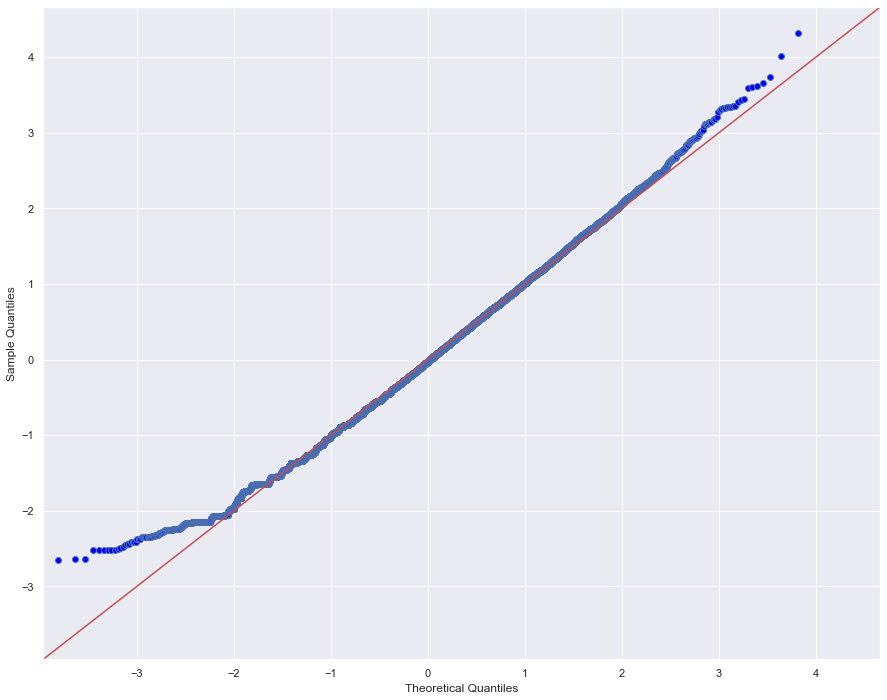

In [136]:
residuals = model_9.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [137]:
y = df_merged[['Global_Sales_log']]
X = df_merged[['Genre_Adventure', 'Total_Score', 'PC', 'Genre_Puzzle', 'Genre_Shooter', 'Genre_Strategy', 'Microsoft', 'Genre_Misc', 'Total_Engagement', 'Sony', 'Genre_Platform', 'Genre_Sports']]
X.head()

,Genre_Adventure,Total_Score,PC,Genre_Puzzle,Genre_Shooter,Genre_Strategy,Microsoft,Genre_Misc,Total_Engagement,Sony,Genre_Platform,Genre_Sports
0,0,0.653875,0,0,0,0,0,0,1.543924,0,0,1
2,0,0.966068,0,0,0,0,0,0,2.554294,0,0,0
3,0,0.803988,0,0,0,0,0,0,1.592379,0,0,1
6,0,1.263895,0,0,0,0,0,0,2.048882,0,1,0
7,0,-0.606479,0,0,0,0,0,1,0.609186,0,0,0


In [138]:
y.head()

,Global_Sales_log
0,4.278467
2,3.700539
3,3.645299
6,3.580172
7,3.559624


In [142]:
X = X.dropna()
X.isnull().sum()

Genre_Adventure     0
Total_Score         0
PC                  0
Genre_Puzzle        0
Genre_Shooter       0
Genre_Strategy      0
Microsoft           0
Genre_Misc          0
Total_Engagement    0
Sony                0
Genre_Platform      0
Genre_Sports        0
dtype: int64

In [143]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [145]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [146]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [147]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.03609485]
 [ 0.23176047]
 [ 0.33325043]
 ...
 [ 0.12015855]
 [ 0.3277977 ]
 [-0.06194052]]


In [148]:
r2_score(y_test,y_pred)

0.12482227008575908

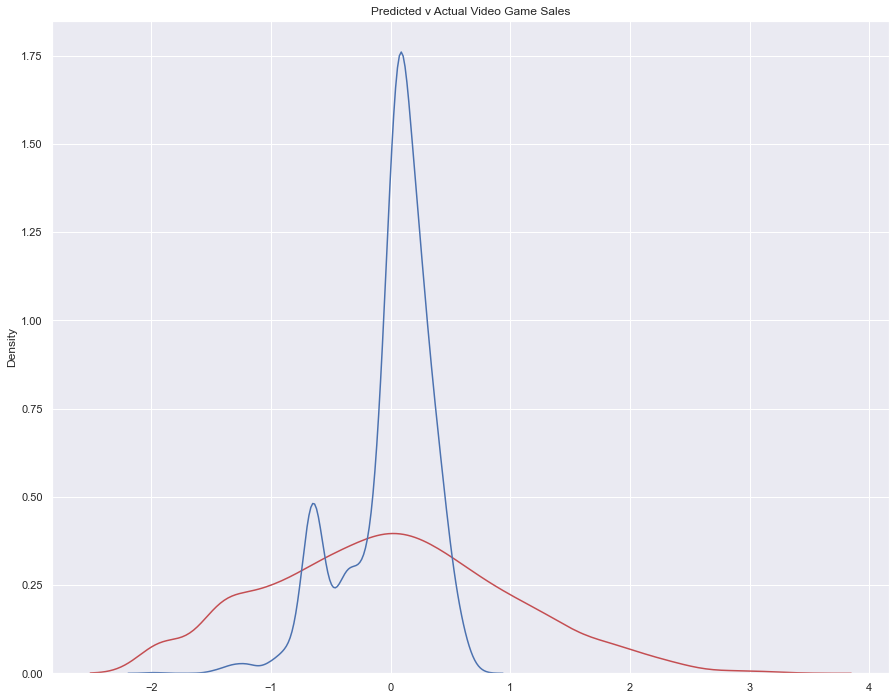

In [149]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [114]:
df_model = df_merged[['Sml_Publisher', 'Year_of_Release_log', 'Critic_Score_log', 'Adventure', 'Lge_Publisher', 'Strategy', 'Microsoft', 'Sony', 'Nintendo', 'User_Score_log', 'Atari', 'Shooter', 'Puzzle', 'Misc', 'Sports', 'Med_Publisher', 'Simulation', 'Racing', 'Sega']]
df_model.head()

,Sml_Publisher,Year_of_Release_log,Critic_Score_log,Adventure,Lge_Publisher,Strategy,Microsoft,Sony,Nintendo,User_Score_log,Atari,Shooter,Puzzle,Misc,Sports,Med_Publisher,Simulation,Racing,Sega
14,0,-1.159716,-0.828286,0,0,0,1,0,0,-0.354525,0,0,0,1,0,1,0,0,0
16,0,0.316354,2.310099,0,0,0,0,1,0,0.884669,0,0,0,0,0,1,0,0,0
23,0,0.316354,2.310099,0,0,0,1,0,0,0.826983,0,0,0,0,0,1,0,0,0
27,0,-1.159716,0.002353,0,1,0,0,0,1,0.224050,0,0,0,0,0,0,0,0,0
29,0,-0.667448,1.651252,0,1,0,1,0,0,-3.254173,0,1,0,0,0,0,0,0,0


In [115]:
y = df_merged[['Global_Sales_log']]
X = df_model

In [116]:
X = X.dropna()
X.isnull().sum()

Sml_Publisher          0
Year_of_Release_log    0
Critic_Score_log       0
Adventure              0
Lge_Publisher          0
Strategy               0
Microsoft              0
Sony                   0
Nintendo               0
User_Score_log         0
Atari                  0
Shooter                0
Puzzle                 0
Misc                   0
Sports                 0
Med_Publisher          0
Simulation             0
Racing                 0
Sega                   0
dtype: int64

In [117]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [118]:
np.any(np.isnan(y))

False

In [119]:
np.all(np.isfinite(y))

True

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [121]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [122]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [123]:
y_pred=ml.predict(X_test)
print(y_pred)

[[-0.78479004]
 [ 0.83166504]
 [ 0.33361816]
 ...
 [ 0.98181152]
 [ 0.78442383]
 [-0.43823242]]


In [124]:
r2_score(y_test,y_pred)

0.3100232032659339

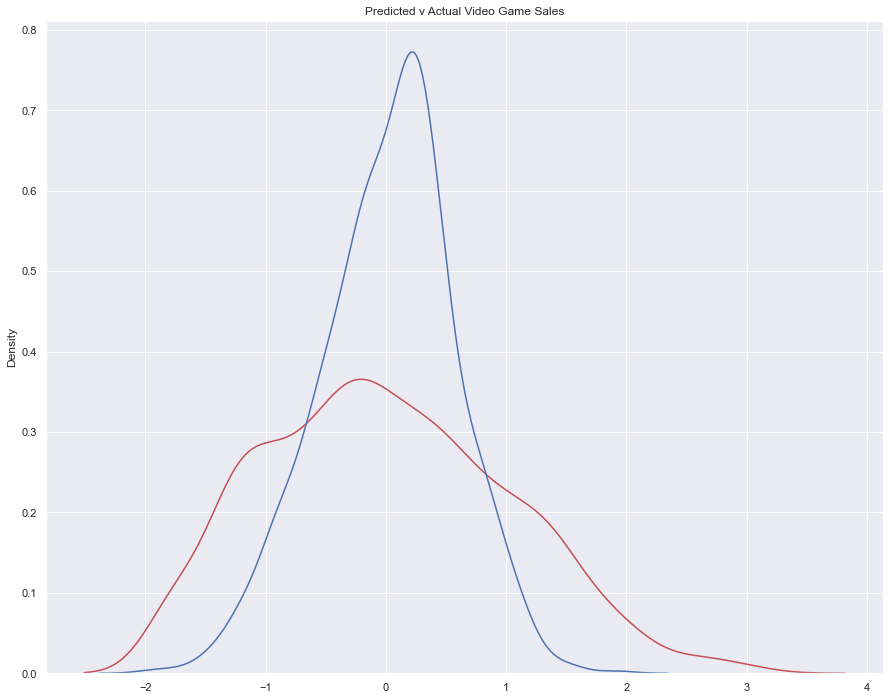

In [125]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [126]:
df_model_final = df_model[['User_Score_log','Critic_Score_log','Sony','Shooter','Med_Publisher','Simulation','Racing']]
df_model_final.head()

,User_Score_log,Critic_Score_log,Sony,Shooter,Med_Publisher,Simulation,Racing
14,-0.354525,-0.828286,0,0,1,0,0
16,0.884669,2.310099,1,0,1,0,0
23,0.826983,2.310099,0,0,1,0,0
27,0.224050,0.002353,0,0,0,0,0
29,-3.254173,1.651252,0,1,0,0,0


In [127]:
y = df_merged[['Global_Sales_log']]
X = df_model_final

In [128]:
X = X.dropna()
X.isnull().sum()

User_Score_log      0
Critic_Score_log    0
Sony                0
Shooter             0
Med_Publisher       0
Simulation          0
Racing              0
dtype: int64

In [129]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [130]:
np.any(np.isnan(y))

False

In [131]:
np.all(np.isfinite(y))

True

In [132]:
X.shape

(5270, 7)

In [133]:
y.shape

(5270, 1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [135]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [136]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [137]:
y_pred=ml.predict(X_test)
print(y_pred)

[[-0.02558281]
 [ 0.32817594]
 [-0.16392136]
 ...
 [ 0.8181363 ]
 [ 0.31208708]
 [-0.16392136]]


In [138]:
r2_score(y_test,y_pred)

0.1317265135342961

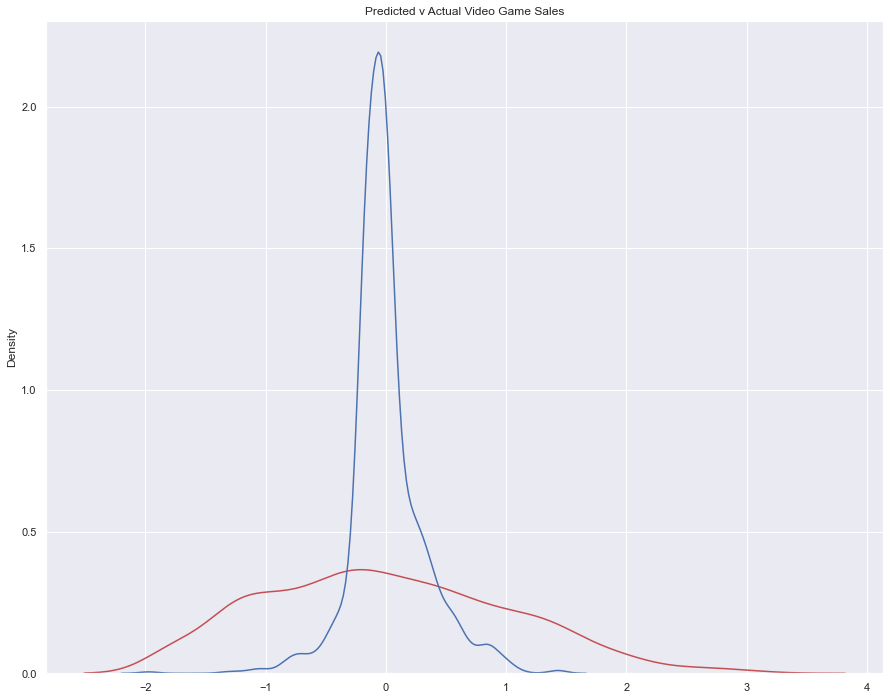

In [139]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [140]:
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,User_Score_log,Action,Adventure,Fighting,Misc,Platform,Puzzle,...,Sports,Strategy,Lge_Publisher,Med_Publisher,Sml_Publisher,Nintendo,Sony,Sega,Microsoft,Atari
14,3.321129,-1.159716,-0.828286,-0.354525,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
16,3.297410,0.316354,2.310099,0.884669,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
23,3.127748,0.316354,2.310099,0.826983,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
27,3.080246,-1.159716,0.002353,0.224050,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
29,3.062130,-0.667448,1.651252,-3.254173,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [141]:
df_merged['Score_log'] = (df_merged['Critic_Score_log'] + df_merged['User_Score_log']) / 2
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5270 entries, 14 to 16718
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_Sales_log     5270 non-null   float64
 1   Year_of_Release_log  5270 non-null   float64
 2   Critic_Score_log     5270 non-null   float64
 3   User_Score_log       5270 non-null   float64
 4   Action               5270 non-null   uint8  
 5   Adventure            5270 non-null   uint8  
 6   Fighting             5270 non-null   uint8  
 7   Misc                 5270 non-null   uint8  
 8   Platform             5270 non-null   uint8  
 9   Puzzle               5270 non-null   uint8  
 10  Racing               5270 non-null   uint8  
 11  Role_Playing         5270 non-null   uint8  
 12  Shooter              5270 non-null   uint8  
 13  Simulation           5270 non-null   uint8  
 14  Sports               5270 non-null   uint8  
 15  Strategy             5270 non-null  

In [142]:
drop_cols = ['Year_of_Release_log','Critic_Score_log', 'User_Score_log', 'Lge_Publisher', 'Med_Publisher', 'Sml_Publisher']

df_merged.drop(drop_cols, axis=1, inplace=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5270 entries, 14 to 16718
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Global_Sales_log  5270 non-null   float64
 1   Action            5270 non-null   uint8  
 2   Adventure         5270 non-null   uint8  
 3   Fighting          5270 non-null   uint8  
 4   Misc              5270 non-null   uint8  
 5   Platform          5270 non-null   uint8  
 6   Puzzle            5270 non-null   uint8  
 7   Racing            5270 non-null   uint8  
 8   Role_Playing      5270 non-null   uint8  
 9   Shooter           5270 non-null   uint8  
 10  Simulation        5270 non-null   uint8  
 11  Sports            5270 non-null   uint8  
 12  Strategy          5270 non-null   uint8  
 13  Nintendo          5270 non-null   uint8  
 14  Sony              5270 non-null   uint8  
 15  Sega              5270 non-null   uint8  
 16  Microsoft         5270 non-null   uint8 

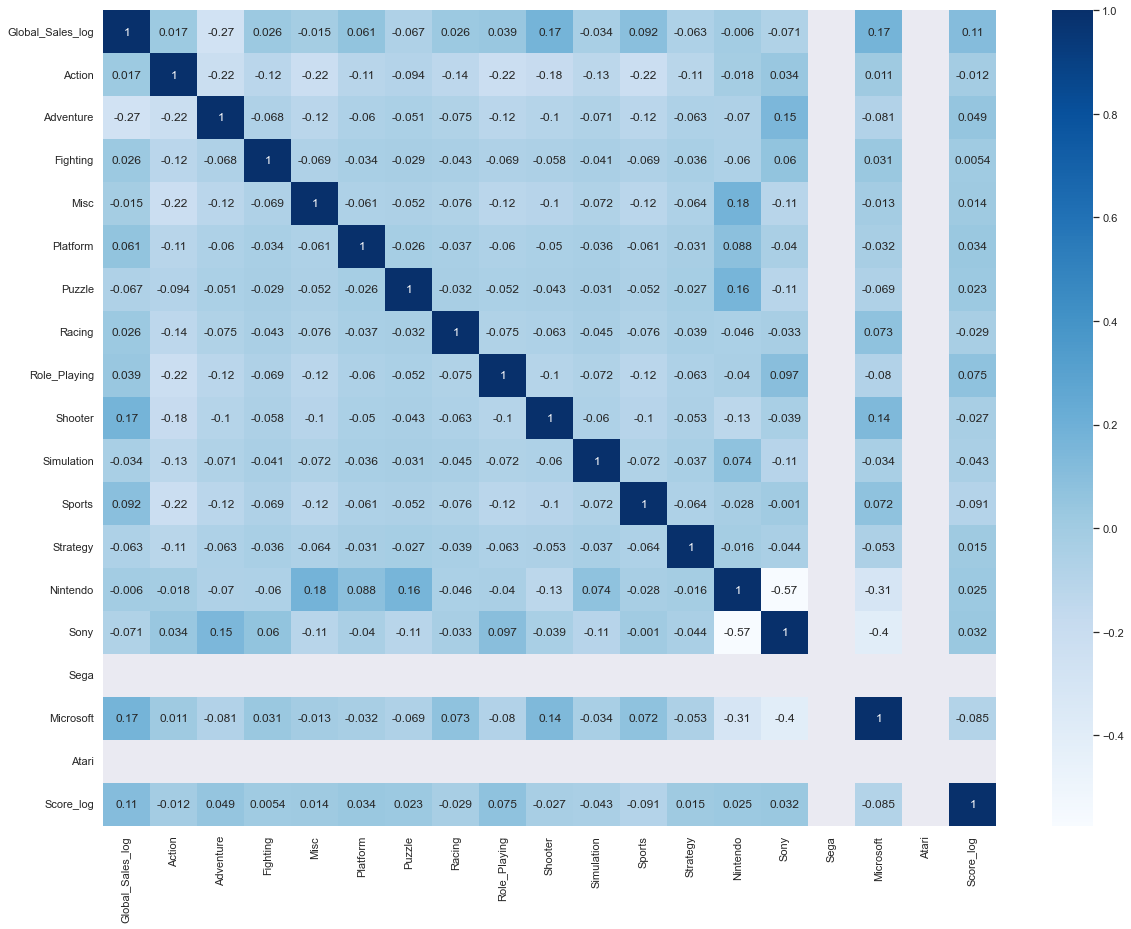

In [143]:
corr = df_merged.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, cmap="Blues", annot=True);

In [144]:
all_cols = df_merged.columns[1:19]

cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_8 = smf.ols(formula=f, data=df_merged).fit()
    print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     65.32
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          4.54e-182
Time:                        20:54:04   Log-Likelihood:                -7026.7
No. Observations:                5270   AIC:                         1.409e+04
Df Residuals:                    5254   BIC:                         1.419e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.784e+12   1.39e+12     -1.288   

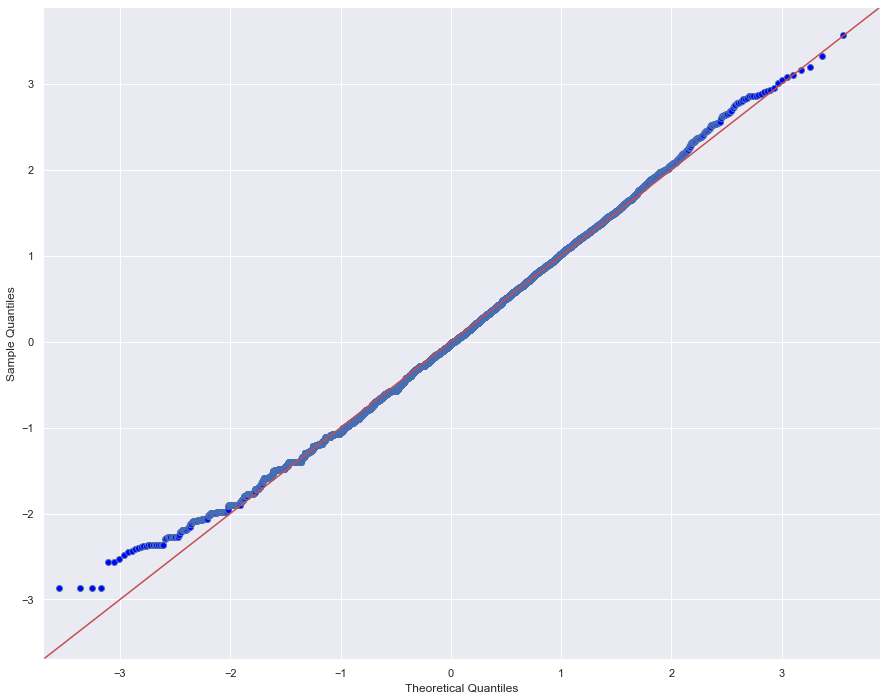

In [145]:
residuals = model_8.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [155]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [157]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [158]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [159]:
y_pred=ml.predict(X_test)
print(y_pred)

[[-0.70611572]
 [ 0.1126709 ]
 [ 0.00305176]
 ...
 [ 0.76495361]
 [ 0.60681152]
 [-0.11798096]]


In [160]:
r2_score(y_test,y_pred)

0.15904420544617548

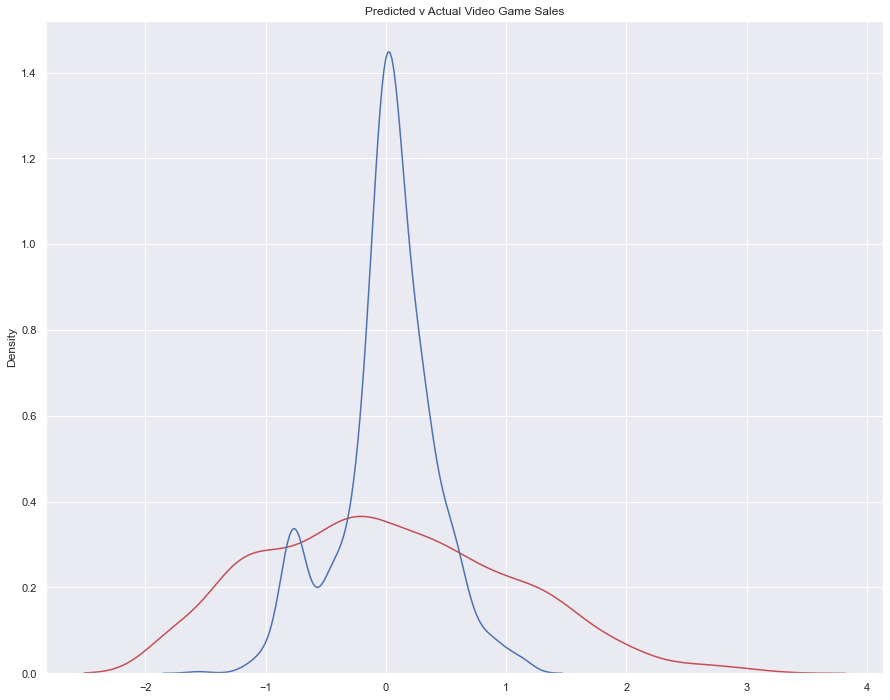

In [161]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()